### Load necessary modules and data

In the previouse 2 tutorials, we have talked about the how to use the basic TransCompR and how to introduce covariates into the regression. For those who are also interested in including the PC-covariates interaction terms (i.e., the multiplication of the PCs and the covariates) in the regression, here are the simple steps of doing so.

But first, as usual, let us load the example data first:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import TransCompR as tcr

In [2]:
human_metadata = pd.read_csv('C:\\Users\\Ran\\Documents\\microarrays\\GSE33341\\GSE33341_human_metadata.csv', index_col='Sample_geo_accession')
human_expression = pd.read_csv('C:\\Users\\Ran\\Documents\\microarrays\\GSE33341\\human_expression_geneID.csv', index_col='ID_REF')
mouse_metadata = pd.read_csv('C:\\Users\\Ran\\Documents\\microarrays\\GSE33341\\GSE33341_mouse_metadata.csv', index_col='Sample_geo_accession')
mouse_expression = pd.read_csv('C:\\Users\\Ran\\Documents\\microarrays\\GSE33341\\mouse_expression_geneID.csv', index_col='ID_REF')
human_classes = human_metadata['pathogen']!='-'

Note that the columns of the ogranism 1 and 2's data has been matched already in this example. Now let's give it a preview:

In [3]:
human_expression.head(10)

,DDR1,RFC2,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,CYP2E1,EPHB3,...,ALS2CL,SMIM14,EMC10,LAMA1,FBXO31,SLC44A1,KCNE4,TMEM231,SNHG17,NPEPL1
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM824707,7.00889,7.24200,8.33034,4.03420,8.39803,5.96307,4.69108,10.61470,3.93123,5.72421,...,7.36255,4.30174,5.11359,4.66935,6.14547,4.76208,4.02242,4.10080,6.61629,7.58422
GSM824708,7.09632,6.87557,7.99800,3.83309,9.40449,5.72081,4.26818,10.52270,3.88945,5.75642,...,6.79736,5.02472,5.16065,4.58411,6.15040,4.83636,4.17451,4.21577,7.18347,7.41464
GSM824709,6.94109,6.86724,7.89547,3.53612,9.24506,5.49332,4.31802,11.26410,3.93450,5.30894,...,6.62297,4.70408,4.89644,4.77543,6.25433,4.96199,3.99491,4.09268,8.06889,7.31179
GSM824710,6.90002,7.11689,7.85057,3.76981,9.26308,5.57711,4.35805,11.50350,4.01784,5.44269,...,6.73836,5.09136,5.07144,4.73067,5.89206,5.22872,3.94885,4.23540,7.67487,7.26331
GSM824711,7.45450,7.65023,8.27229,3.86178,9.80692,5.90567,4.60175,11.27680,3.77905,6.07312,...,7.33798,4.31237,6.08119,4.50602,6.42534,5.58384,4.04788,4.11791,8.00925,7.75276
GSM824712,6.69461,7.29010,8.09235,3.51172,8.23593,5.68906,4.45657,9.83553,4.13670,5.56029,...,6.76512,4.25240,4.99386,4.71473,6.05080,4.69516,4.19092,4.34889,7.62965,7.37518
GSM824713,6.87552,6.89077,7.82074,3.48766,9.51382,5.31584,4.12190,11.36380,4.01738,5.57850,...,7.18054,4.00362,5.67785,4.58578,6.35228,4.55718,4.04887,4.10583,7.08354,7.36076
GSM824714,6.87659,7.26177,7.92639,3.65178,8.94733,5.29128,4.40682,9.82324,3.94275,5.65832,...,6.93221,4.01623,5.11251,5.02290,5.89656,4.52838,4.12902,4.10702,7.95580,7.48174
GSM824715,7.16348,7.30111,8.45341,3.75418,8.43574,5.52944,4.56456,11.32970,3.92538,5.70801,...,7.26387,4.27305,5.18532,4.82684,6.26611,4.92633,4.07648,4.38087,7.76745,7.73944


In [4]:
mouse_expression.head(10)

,Ddr1,Rfc2,Pax8,Guca1a,Uba7,Thra,Ptpn21,Ccl5,Cyp2e1,Ephb3,...,Als2cl,Smim14,Emc10,Lama1,Fbxo31,Slc44a1,Kcne4,Tmem231,Snhg17,Npepl1
ID_REF,,,,,,,,,,,,,,,,,,,,,
GSM824455,6.59075,7.16547,4.64884,5.24159,9.67901,6.45267,6.51602,10.27910,13.30180,6.14806,...,6.42583,9.97392,8.76198,3.72310,6.85752,9.04414,5.96308,5.69251,5.83802,8.29632
GSM824456,6.28290,7.64314,4.11605,5.18289,10.03550,6.73455,6.13205,10.16850,5.05888,6.17968,...,6.51857,10.25670,9.04596,3.48279,6.93879,9.53237,5.90119,5.58291,6.15930,8.17503
GSM824457,6.61388,7.56823,3.94917,4.81408,9.96304,6.65090,6.10990,10.96150,10.99300,5.97237,...,6.53526,10.17460,9.22475,3.71384,6.99318,9.20157,5.81836,5.65909,6.22437,8.35139
GSM824458,6.31724,7.08073,3.98135,5.14003,8.55048,6.36744,6.72110,10.15500,13.66380,5.79291,...,5.79879,9.44714,8.83273,3.71983,8.56007,8.61856,5.72251,5.52079,5.74857,8.33560
GSM824459,6.37421,7.31968,4.42089,4.95410,9.26919,6.55388,6.37879,10.25590,13.04120,5.91085,...,6.05432,9.86302,8.57774,3.65745,8.51932,9.39061,6.00684,5.80044,5.84194,7.91521
GSM824460,6.37428,7.49725,4.17620,5.38814,9.22984,6.65039,6.29226,10.51860,12.98680,5.92439,...,6.01197,9.83926,8.83082,3.61815,8.16563,8.73853,5.99903,5.98325,5.95270,8.56109
GSM824461,6.56696,7.24045,4.63141,5.23219,10.03310,6.29659,6.36184,10.82330,11.35410,6.17993,...,5.84615,10.24530,8.50277,3.66471,6.54469,10.07810,6.05632,5.95467,5.96663,8.35363
GSM824462,6.57117,7.30288,4.27666,5.29497,9.77620,6.21170,6.16470,9.97579,10.80650,6.52038,...,5.87113,10.39910,8.50116,3.87288,6.58916,9.91247,6.23784,6.30368,6.06283,8.13063
GSM824463,6.41298,7.46406,4.45465,5.25425,9.87129,6.30651,6.06194,10.85680,6.82483,6.49700,...,5.93887,10.25460,8.26271,3.75790,6.15841,9.86177,6.33235,6.24784,6.09837,8.24744


The TransCompR essentially takes 3 inputs: The profile of organism 1, the profile of organism 2, and the binary classes of organism 2 that has the biological significance we are interested in. What TransCompR does is to use **organism 1's pattern** to interpret **organism 2's classes**.

In this tutorial, since we are interested in how the mouse feature pattern is indicative of human infection status, let's be clear about the variable assignment here: **organism 1 is mouse and organism 2 is human**.

### Applying the TransCompR Method

The main function in this package is `TransCompR`, which performs the cross-species transcriptomic comparison. In the simplest scenario, it works like:
`results = tcr.TransCompR(organism1_data, organism2_data, organism2_classes)`, which will run PCA on your organism 1's data, keep the top 50 PC by default, project organism 2's data into the feature space derived from organism 1, and perform a logistic regression with l1 penalty and C = 1.0 on the organism 2 classes over the projected organism 2's data.

Given that our organism 1 is mouse and organism 2 is human, the code to run TransCompR should be:

`results = tcr.TransCompR(mouse_expression, human_expression, human_classes)`

...And this is what we discussed in the basic tutorial. But we know that in any biological studies, covariates have significant contribution to the data, so it is relatively biased to not consider the effect of covariates. Let's say we want to see how ethnicity, host gender, host age, pathogen type, anatomic site, ad experimental batch contributes to the regression result:

In [5]:
human_metadata.head(5)

,Sample_title,Sample_source_name_ch1,Sample_organism_ch1,ethnicity,host gender,host age (yr),pathogen,anatomic site of infection,experimental batch
Sample_geo_accession,,,,,,,,,
GSM824707,blood patient with E. coli bacteremia [CS101-D...,blood patient with E. coli bacteremia prior an...,Homo sapiens,Black,Female,43,Escherichia coli,Urinary tract,2034
GSM824708,blood patient with E. coli bacteremia [D887.2....,blood patient with E. coli bacteremia prior an...,Homo sapiens,White,Female,49,Escherichia coli,Urinary tract,2034
GSM824709,blood patient with E. coli bacteremia [CSD5036...,blood patient with E. coli bacteremia prior an...,Homo sapiens,Black,Female,44,Escherichia coli,Urinary tract,2034
GSM824710,blood patient with E. coli bacteremia [CSD2575...,blood patient with E. coli bacteremia prior an...,Homo sapiens,White,Female,70,Escherichia coli,Urinary tract,2034
GSM824711,blood patient with E. coli bacteremia [D2341.CEL],blood patient with E. coli bacteremia prior an...,Homo sapiens,Black,Male,40,Escherichia coli,Urinary tract,2287


In [6]:
human_covar = human_metadata[['ethnicity','host gender','host age (yr)','anatomic site of infection']]
human_covar

,ethnicity,host gender,host age (yr),anatomic site of infection
Sample_geo_accession,,,,
GSM824707,Black,Female,43,Urinary tract
GSM824708,White,Female,49,Urinary tract
GSM824709,Black,Female,44,Urinary tract
GSM824710,White,Female,70,Urinary tract
GSM824711,Black,Male,40,Urinary tract
...,...,...,...,...
GSM932380,White,Male,65,Urinary Tract
GSM932381,White,Female,63,Urinary Tract
GSM932382,White,Female,81,Urinary Tract


Now let's pass the covariates into the TransCompR. TransCompR will use one hot encoding to create dummies for the categorical covariates. By default, it treats all covariates as **categorical**. If some of them are not categorical--for example, in this dataset `'host age (yr)'` is not categorical--you need to specify the exact non-categorical covariates names in a list and pass it to the argument `non_cat_covar`.

This time, since we want to include the interactions between pcs and covariates, you need to set the argument `use_interaction` to `True`

In [7]:
results_with_covar = tcr.TransCompR(mouse_expression,
                                    human_expression, 
                                    human_classes,
                                    organism2_covar = human_covar, 
                                    non_cat_covar = ['host age (yr)'],
                                    penalty = 'l1',
                                    use_interaction = True,
                                    random_state = 42)

Let's take a look at PC's coefficients when covariates and the interaction between PCs and covariates are also in the regression.

In [8]:
results_with_covar['predictivity_summary']['coefs'][results_with_covar['predictivity_summary']['coefs']!=0]

1     0.000740
2    -2.073076
6     1.780977
7    -0.548695
10   -0.386939
42   -0.126828
44   -0.157972
47    0.496227
Name: coefs, dtype: float64

In [9]:
results_with_covar['all_regression_coeffs'][(results_with_covar['all_regression_coeffs']!=0).values]

,coefs
1,0.000740
2,-2.073076
6,1.780977
7,-0.548695
10,-0.386939
42,-0.126828
44,-0.157972
47,0.496227
dummy_ethnicity_Black,0.379204
host age (yr),0.124926


Let's see how dummies separate the data:

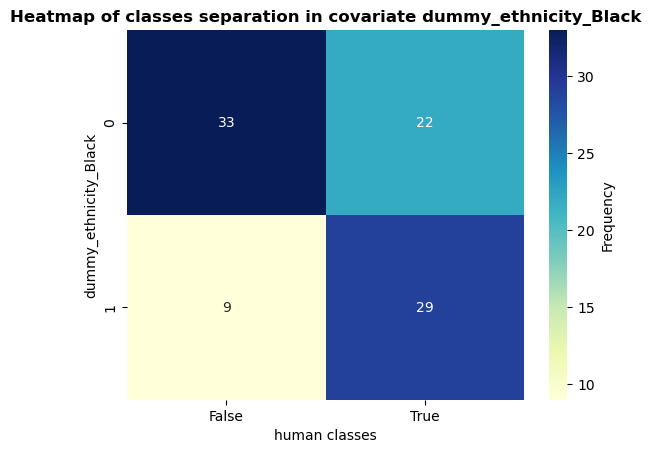

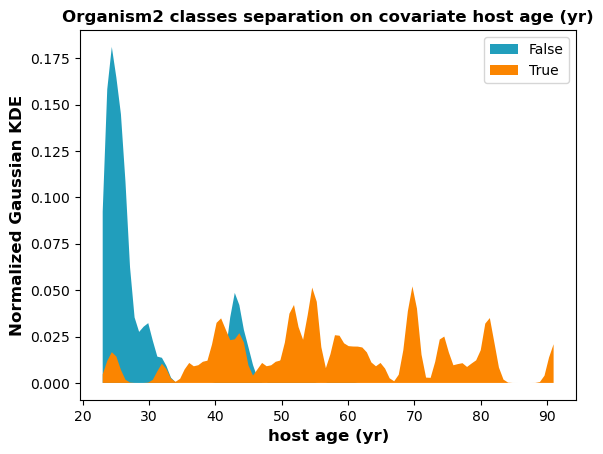

In [10]:
tcr.plot.partition(results_with_covar,organism2_name='human', 
                   covar=['dummy_ethnicity_Black','host age (yr)'])

Notice there is an interaction term stands out in the regression. We can visualize the PC scores of different organism2 classes in different categories of covariate. Since we would like to visualize all categories of a covariate, this time we use the covariate name defined in the `organism2_covar` instead of the dummy name.

This function takes exactly 1 covariate at a time, and you need to specify if it is categorical. Although no specific interaction term stands out, we now do a PC 7 (index 6) over the covariate `ethnicity` as a desmonstration of the plotting function (and yes, we customized the palette this time for the aesthetic reason):

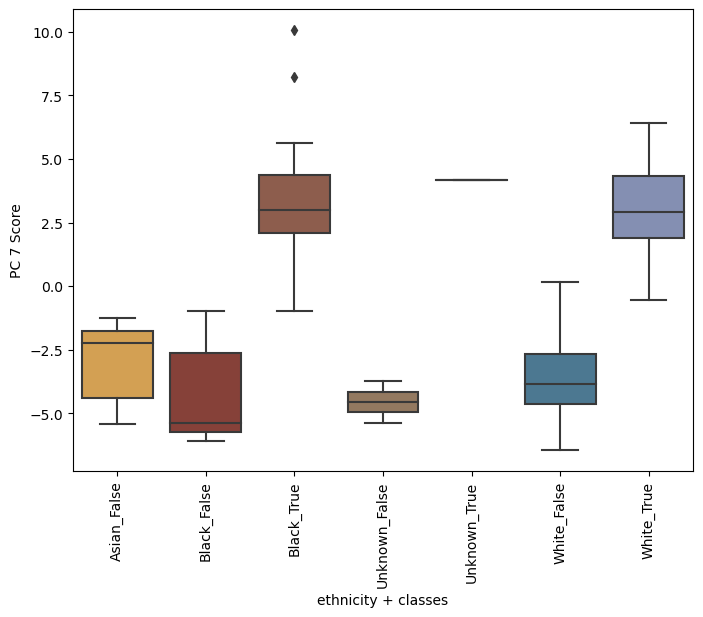

In [11]:
kwargs={'palette': ["#E8A43E","#93372c","#985842","#9c7957","#ddd9c3","#407b9d","#7c8bba"]}
tcr.plot.covariate_pc_interaction(results_with_covar, 
                                  human_covar, 
                                  covar_key = 'ethnicity',
                                  pc = 6, is_categorical = True,**kwargs)

If there is a strong interaction between PC7 and one of the ethnicity dummies, we should see a distinct difference between the PC scores of 2 classes among different races. But just like the interaction does not stands out of the penalization, the uninfected (false) PC7 scores and infected(true) PCs among different ethnicities do not differ much, although we do see a significant difference in PC scores between the infected and uninfected subjects of **all** ethnicities.

When the covariates are non-categorical, this function will automatically group the covariates into n bins and return you a bar plot where the bar height represent the averaged PC score in the bin. Let's see how that works, assuming we want to see the interaction between PC7 and host age.

Assume the covariate is continuous


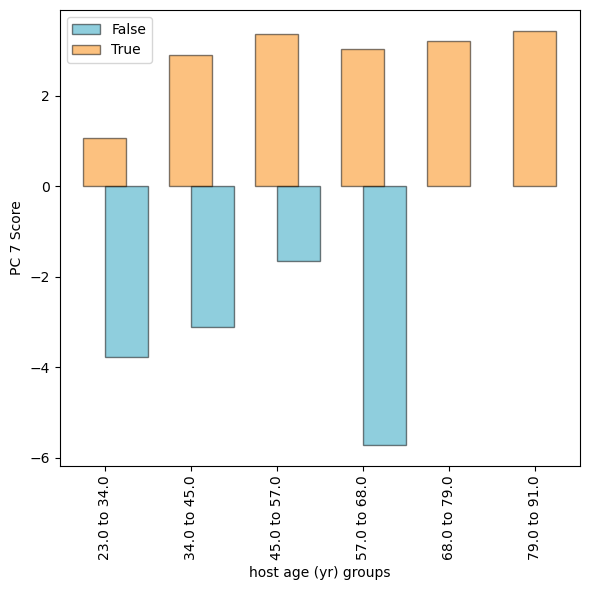

In [13]:
tcr.plot.covariate_pc_interaction(results_with_covar, 
                                  human_covar, nbins = 6,
                                  covar_key = 'host age (yr)',
                                  pc = 6, is_categorical = False)

What this plot tells us is that 1) for youngest group of infected subjects (aged from 23 to 34), they have lower averaged PC 7 score compared to elder groups of infected subject. 2) middle-age healthy subjects (45 to 57 y/o) have the least negative PC 7 score.